In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch

%matplotlib inline

In [102]:
df = pd.read_excel("full game vs Huddersfield Town Sheet.xlsx")

In [103]:
df.head()

,N#,Category,Start,Click,End,Location,Player Name,Pass,Des 3
0,1,Pass,03:22,03:27,03:32,9;70,Benjamin Mendy,Pass Sideways,NaN
1,2,Pass,03:30,03:35,03:40,23;70,Ilkay Gundogan,Pass Sideways,NaN
2,3,Pass,03:30,03:35,03:40,34;70,Fernandinho,Pass Sideways,NaN
3,4,Pass,03:35,03:40,03:45,21;42,Ilkay Gundogan,Diagonal pass,NaN
4,5,Pass,03:37,03:42,03:47,5;32,Benjamin Mendy,Pass to the space,NaN


In [104]:
df["Player Name"].unique()

array(['Benjamin Mendy', 'Ilkay Gundogan', 'Fernandinho',
       'Aymeric Laporte', 'Vincent Kompany', 'John Stones',
       'Bernando Silva', 'David Silva', 'Ederson', 'Gabriel Jesus',
       'Pass Sideways', 'Sergio Aguero', 'Switch', 'Vertical pass',
       'Pass forward', 'Diagonal pass', 'Riyad Mahrez', 'Leroy Sane'],
      dtype=object)

In [105]:
df["Location"].dropna(inplace=True)

In [106]:
#convert elements in the location column into lists

In [107]:
def convert(string):
    li = list(string.split(";"))
    return li

In [108]:
df["Location"].astype(str)

df["Location"] = df["Location"].apply(convert)

In [109]:
#Draw a football pitch to create a heatmap using the pitch #REFERENCE: FC PYTHON

In [110]:
def draw_pitch(ax):

    
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

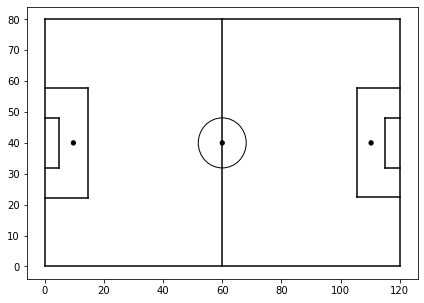

In [111]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [112]:
df.drop(df.index[575], inplace =True)

In [113]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df["Location"])

0        [9, 70]
1       [23, 70]
2       [34, 70]
3       [21, 42]
4        [5, 32]
5       [11, 57]
6       [31, 59]
7       [47, 59]
8       [39, 56]
9       [71, 30]
10       [55, 9]
11      [55, 14]
12      [70, 14]
13      [60, 24]
14      [49, 29]
15      [14, 56]
16      [54, 58]
17      [41, 57]
18      [71, 26]
19      [61, 11]
20      [24, 96]
21      [25, 78]
22      [15, 88]
23       [4, 75]
24      [10, 89]
25      [21, 89]
26     [26, 116]
27     [52, 112]
28     [35, 114]
29      [23, 49]
30       [3, 45]
31       [8, 31]
32      [10, 59]
33      [54, 56]
34      [68, 26]
35      [54, 38]
36      [23, 48]
37      [25, 33]
38      [43, 54]
39      [60, 51]
40      [69, 22]
41      [55, 47]
42      [27, 45]
43      [60, 99]
44     [41, 102]
45      [40, 82]
46     [37, 105]
47      [39, 59]
48      [65, 26]
49      [71, 32]
50      [73, 20]
51      [62, 26]
52      [74, 23]
53      [66, 45]
54      [21, 36]
55      [32, 29]
56       [4, 21]
57      [65, 15]
58       [55, 

In [114]:
#CREATING A HEATMAP FOR ALL KINDS OF PASSINGS BASED ON X AND Y COORDINATES

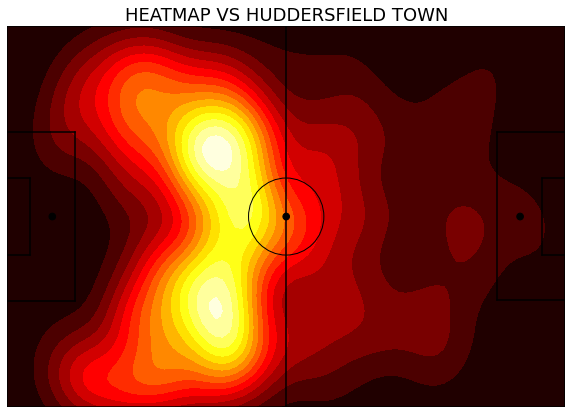

In [115]:
fig=plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
plt.axis('off')


x = [i[1] for i in df["Location"]]
y = [i[0] for i in df["Location"]]

sns.kdeplot(x, y, shade = "True", color = "green", n_levels = 15, cmap ="hot").set_title("HEATMAP VS HUDDERSFIELD TOWN", fontsize=18)
plt.ylim(0,80)
plt.xlim (0,120)
plt.show()

In [116]:
#CREATING A HEATMAP FOR DIAGONAL PASS BASED ON X AND Y COORDINATES(LOCATION)

In [117]:
diagonal_pass = df[(df["Pass"] =="Diagonal pass")][["Location"]]

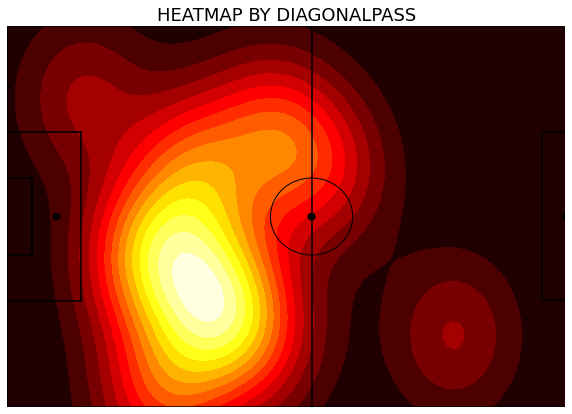

In [118]:
fig=plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
plt.axis('off')


x2 = [i[1] for i in diagonal_pass["Location"]]
y2 = [i[0] for i in diagonal_pass["Location"]]

sns.kdeplot(x2, y2, shade = "True", cmap= "hot", n_levels = 15).set_title("HEATMAP BY DIAGONALPASS", fontsize =18)
plt.ylim(0,80)
plt.xlim (0,110)
plt.show()

In [119]:
#HEATMAP FOR SIDEWAY PASSES

In [120]:
sideway_pass = df[(df["Pass"] =="Pass Sideways")][["Location"]]

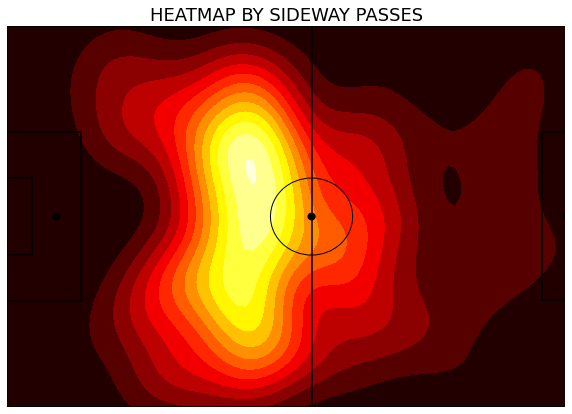

In [121]:
fig=plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
plt.axis('off')


x3 = [i[1] for i in sideway_pass["Location"]]
y3 = [i[0] for i in sideway_pass["Location"]]

sns.kdeplot(x3, y3, shade = "True", cmap= "hot", n_levels = 15).set_title("HEATMAP BY SIDEWAY PASSES", fontsize =18)
plt.ylim(0,80)
plt.xlim (0,110)
plt.show()

In [122]:
# HEATMAP FOR DAVID SILVA

In [123]:
david_silva = df[(df["Player Name"]=="David Silva")][["Location"]]

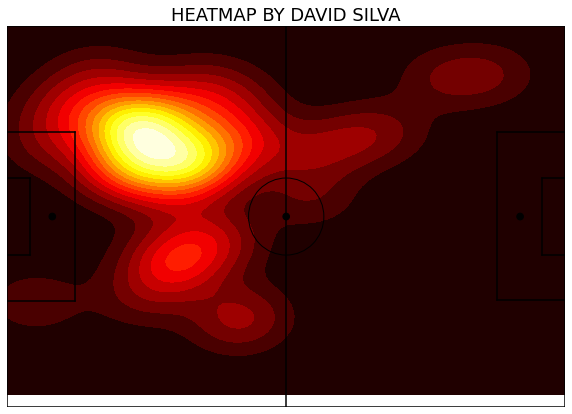

In [124]:
fig=plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
plt.axis('off')


x5 = [i[1] for i in david_silva["Location"]]
y5 = [i[0] for i in david_silva["Location"]]

sns.kdeplot(x5, y5, shade = "True", cmap= "hot", n_levels = 15).set_title("HEATMAP BY DAVID SILVA", fontsize=18)
plt.ylim(0, 80)
plt.xlim (0,120)
plt.show()